# Imports

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Loading Data

In [2]:
laps = pd.read_csv("../raw_data/clean_data.csv")
track_status = pd.read_csv("../raw_data/track_status.csv")
weather = pd.read_csv("../raw_data/weather.csv")
driver_results = pd.read_csv("../raw_data/driver_results.csv")
locations = pd.read_csv("../raw_data/locations.csv")
results = pd.read_csv("../raw_data/results.csv")

# Clean laps

In [3]:
#def add_race_progress(df):
    # Group data to get lap number per year per race
    #grouped_data = df.groupby(by = ["Year", "Location"], as_index=False)["LapNumber"].max().rename(columns={"LapNumber":"TotalLaps"})
    #grouped_data["Year_Location"] = grouped_data["Year"].map(str) + grouped_data["Location"]
    # Group data to get same info as grouped_data
    #df["Year_Location"] = df["Year"].map(str) + df["Location"]
    # Merge data
    #df = df.merge(grouped_data, on="Year_Location")
    # Clean data frame
    #df.drop(columns=["Year_Location", "Year_y", "Location_y"], inplace=True)
    #df["RaceProgress"] = df["LapNumber"] / df["TotalLaps"]
    #df.rename(columns={"Location_x": "Location", "Year_x": "Year"}, inplace=True)
    #return df

#laps = add_race_progress(laps)

#def mask_race_percentage(df, percentage):
    #df = df[df["RaceProgress"] > percentage]
    #return df

#laps = mask_race_percentage(laps, 0.1)

#def get_tyre_stress_level(df):
 #   params = {'Mexico City': 4,
  #  'Lusail': 1,
   # 'Shanghai': 2,
    #'Mugello': 1,
    #'#Hockenheim': 3,
    #'Jeddah': 3,
    #'Imola': 3,
    #'São Paulo': 3,
    #'Montréal': 3,
    #'Singapore': 4,
    #'Marina Bay': 4,
    #'Barcelona': 1,
    #'Spain': 1,
    #'Spa-Francorchamps': 1,
    #'Spielberg': 3,
    #'Melbourne': 3,
    #'Budapest': 3,
    #'Nürburgring': 3,
    #'Suzuka': 1,
    #'Austin': 1,
    #'Zandvoort': 1,
    #'Bahrain': 3,
    #'Portimão': 2,
    #'Sochi': 4,
    #'Monza': 1,
    #'Yas Marina': 3,
    #'Monaco': 5,
    #'Miami': 3,
    #'Istanbul': 1,
    #'Baku': 3,
    #'Monte Carlo': 5,
    #'Yas Island': 3,
    #'Le Castellet': 2,
    #'Sakhir': 3,
    #'Silverstone': 1}
    #df["TyreStressLevel"] = df["Location"].map(params)
    #return df

#laps = get_tyre_stress_level(laps)

#TIRE_MATCH = {
 #   'HYPERSOFT': 'SOFT',
  #  'ULTRASOFT': 'SOFT',
   # 'SUPERSOFT': 'SOFT',
    #'SOFT': 'SOFT',
    #'MEDIUM': 'MEDIUM',
    #'HARD': 'HARD',
    #'INTERMEDIATE': 'INTERMEDIATE',
    #'WET': 'WET',
    #'UNKNOWN': 'UNKNOWN'
#}
#def compound_recategorization(laps,tire_mapping):
#    new_laps = laps.copy()
#    new_laps['Compound']=laps['Compound'].map(tire_mapping)
#    return new_laps

#laps = compound_recategorization(laps, TIRE_MATCH)

#def compound_cleaning(laps,tire_mapping,backfilling=3):
#    new_laps = laps.copy()
#    new_laps = compound_recategorization(new_laps,tire_mapping)
#    new_laps['Compound'].replace('UNKNOWN',None,inplace=True)
#    new_laps['Compound'].fillna(method="bfill",limit=backfilling,inplace=True)
#    return new_laps

#laps = compound_cleaning(laps, TIRE_MATCH)
#
#def pitting(df):
#    df['pitting_this_lap'] = np.where(laps['PitInTime'].notna(), True, False)
#    return df

#laps = pitting(laps)

#laps.drop(columns=['Unnamed: 0', 'Time', 'DriverNumber', 'LapTime',
 #      'Stint', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time',
 #      'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime',
#       'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 
#       'LapStartTime', 'LapStartDate', 'Deleted',
     #  'DeletedReason', 'FastF1Generated', 'IsAccurate', 'TrackStatus'], inplace = True)

#laps["Driver"] = laps["Driver"].fillna("OCO")
#laps["IsPersonalBest"] = laps["IsPersonalBest"].fillna(False)

#driver_missing_compound = laps[laps["Compound"].isna()].Driver
#set(driver_missing_compound)

#laps[(laps["Driver"] == "ALO") & (laps["Location"] == "Spa-Francorchamps") & (laps["Year"] == 2021)]

#laps[laps["Team"].isna()]

#laps["Team"] = laps["Team"].fillna("Renault")

#laps[(laps["Location"] == "Spielberg") & (laps["Year"] == 2018) & (laps["Driver"] == "HAR")]

#laps_with_na_position = laps[laps["Position"].isna()]
#laps_with_na_position["Location_Year"] = laps_with_na_position["Location"] + laps_with_na_position["Year"].map(str)

#laps["Position"] = laps["Position"].fillna(method = "ffill")

#laps.drop_duplicates(inplace=True)

#laps["pitting_this_lap"] = laps["pitting_this_lap"].apply(lambda x: 1 if x == True else 0)

#laps

In [4]:
laps['Compound'].value_counts()

Compound
HARD      19409
SOFT      18552
MEDIUM    17215
Name: count, dtype: int64

# Set X & y

In [5]:
X = laps.drop(columns = 'next_compound')
y = laps['next_compound']

In [6]:
le = LabelEncoder()
le.fit(y)
y_le = le.transform(y)
y_cat = to_categorical(y_le, num_classes=None, dtype = 'float32')
y_cat

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

# Train Test Val Split

In [7]:
laps_for_model = laps.copy()
train_df = laps_for_model[laps_for_model['Year'] < 2022]
val_df = laps_for_model[laps_for_model['Year'] == 2022]
test_df = laps_for_model[laps_for_model['Year'] == 2023]
train_df_shuffled = train_df.sample(frac=1)
val_df_shuffled = val_df.sample(frac=1)
test_df_shuffled = test_df.sample(frac=1)
y_train = train_df_shuffled['next_compound']
y_val = val_df_shuffled['next_compound']
y_test = test_df_shuffled['next_compound']
X_train = train_df_shuffled.drop(columns=['next_compound', 'Unnamed: 0', 'Unnamed: 0_w', 'Time_w', 'Time_min', 'status_list'])
X_val = val_df_shuffled.drop(columns=['next_compound', 'Unnamed: 0', 'Unnamed: 0_w', 'Time_w', 'Time_min', 'status_list'])
X_test = test_df_shuffled.drop(columns=['next_compound', 'Unnamed: 0', 'Unnamed: 0_w', 'Time_w', 'Time_min', 'status_list'])

In [8]:
le = LabelEncoder()
le.fit(y_train)
y_train_le = le.transform(y_train)
y_test_le = le.transform(y_test)
y_val_le = le.transform(y_val)
y_train_cat = to_categorical(y_train_le, num_classes=None, dtype = 'float32')
y_test_cat = to_categorical(y_test_le, num_classes=None, dtype = 'float32')
y_val_cat = to_categorical(y_val_le, num_classes=None, dtype = 'float32')

# Preprocessing

In [9]:
feat_numerical = sorted(X.select_dtypes(include=["int64", "float64"]).columns)

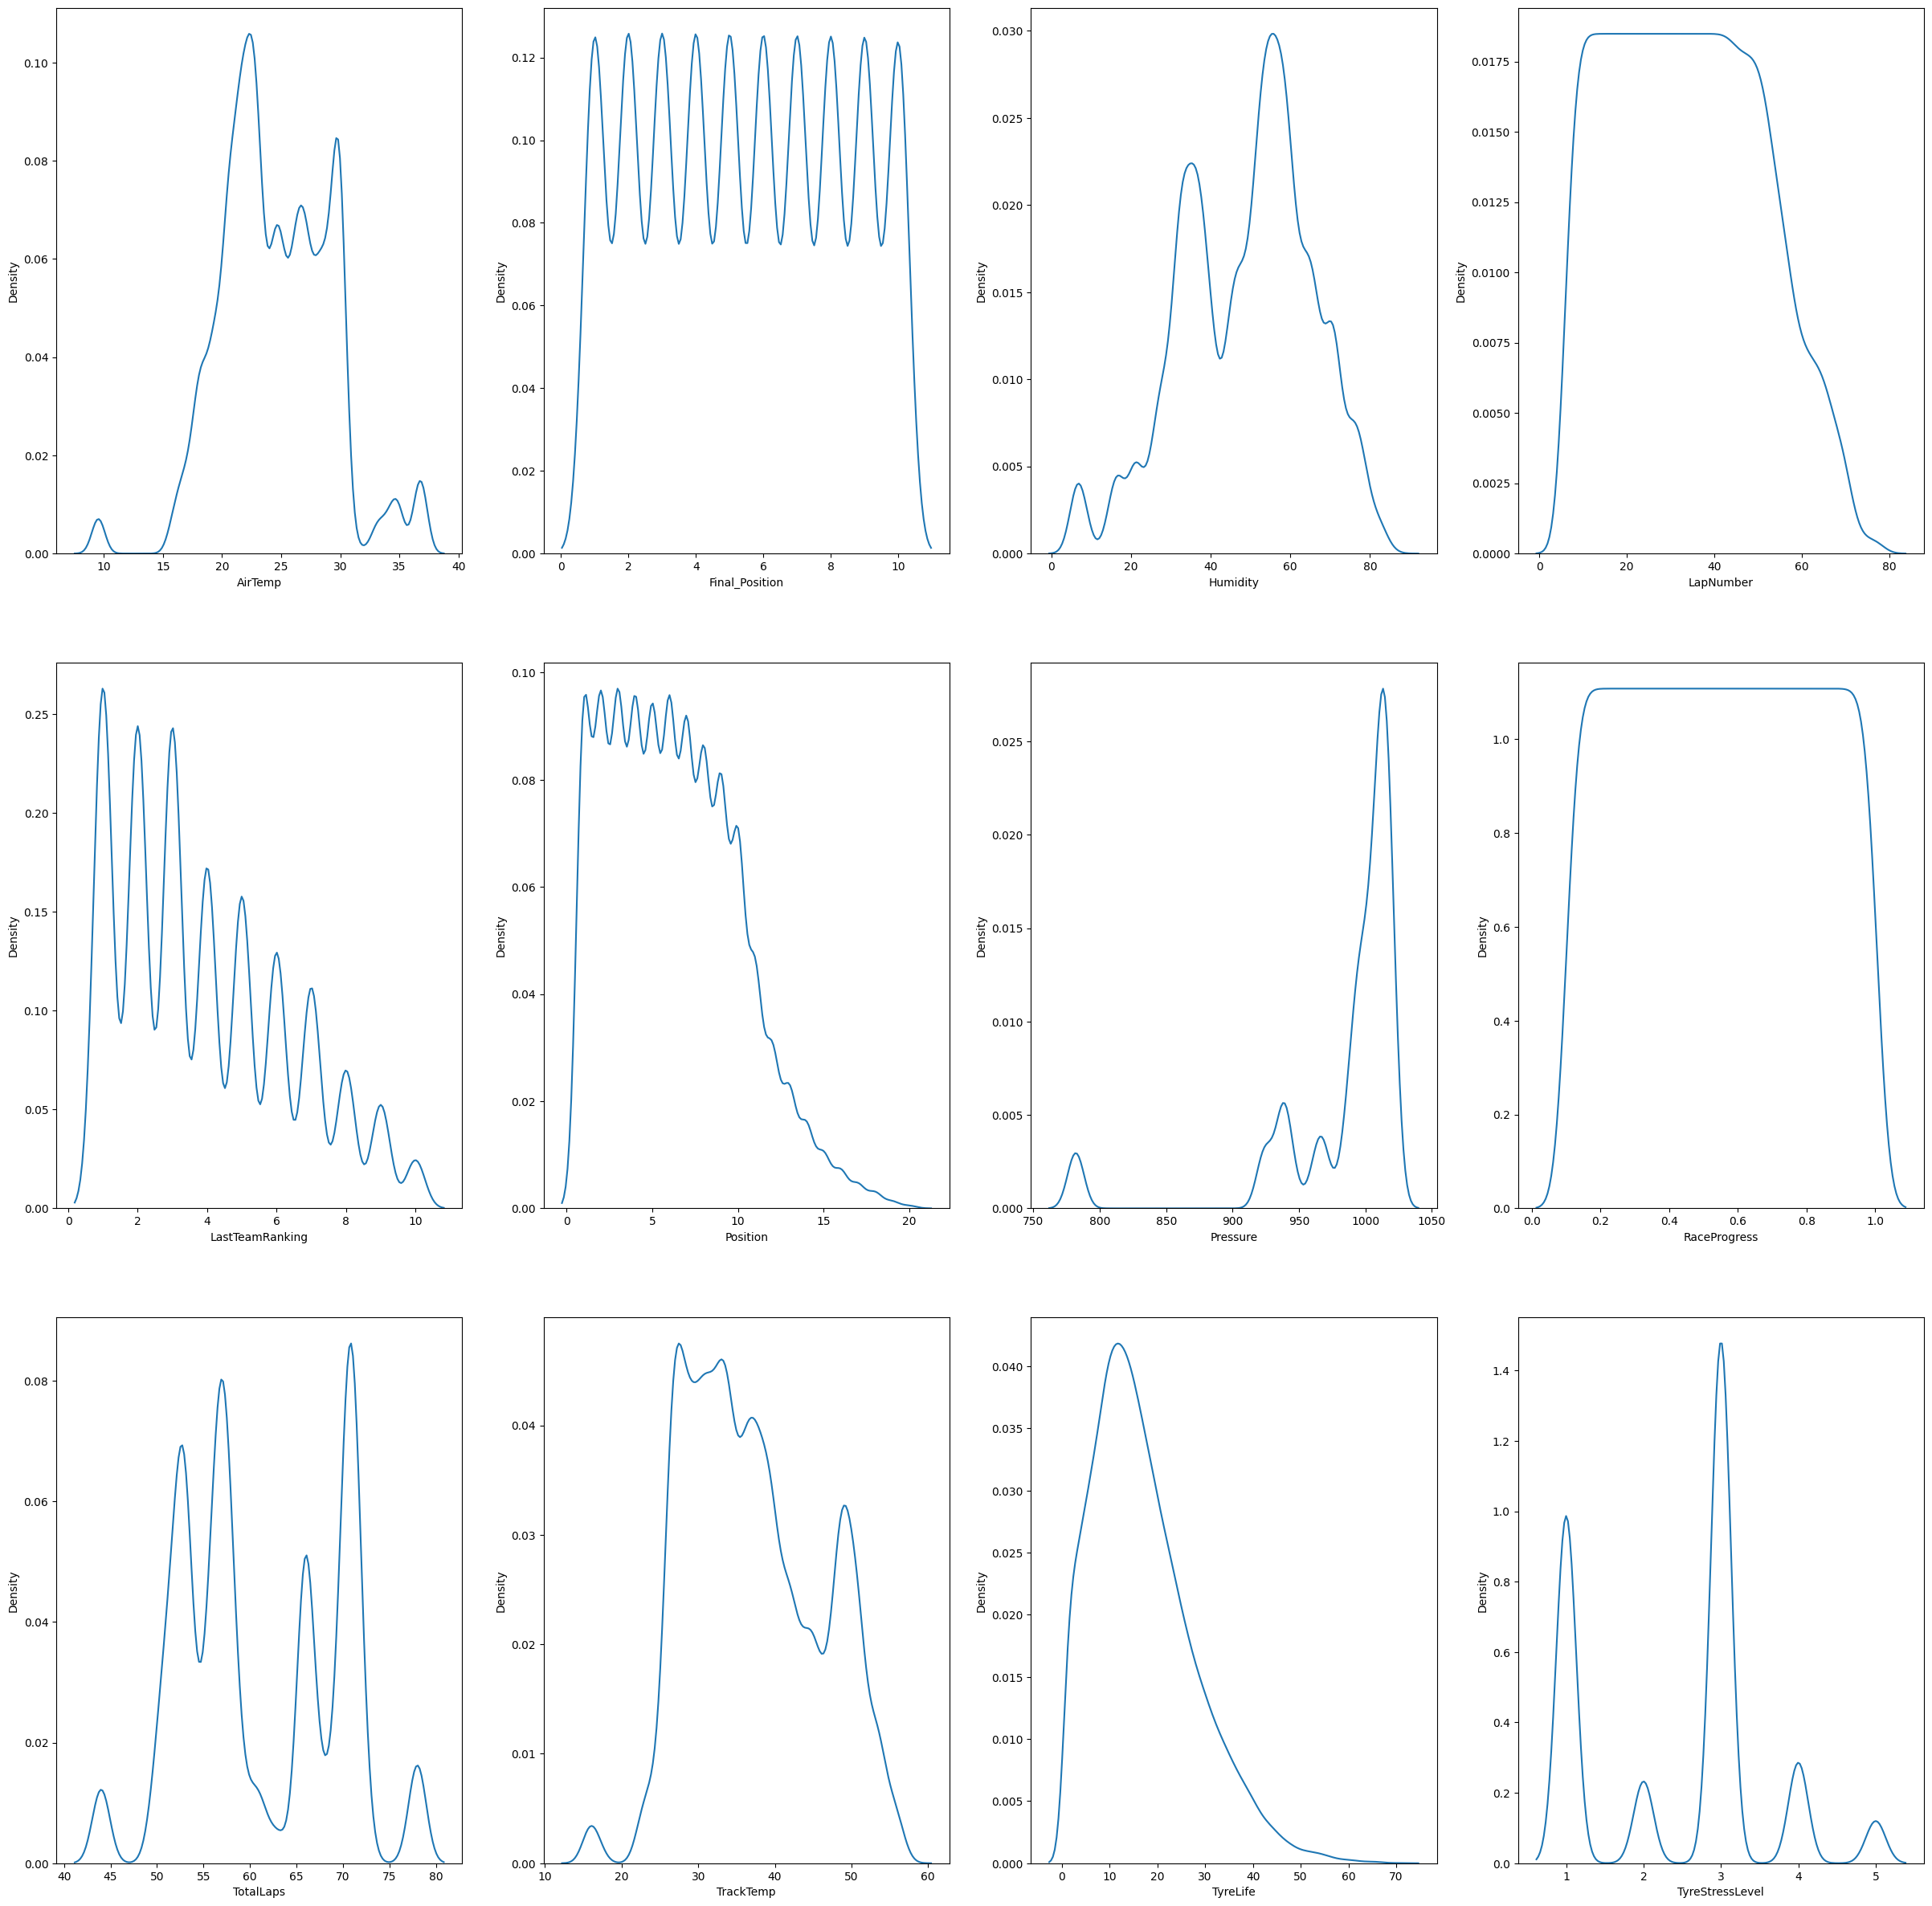

In [10]:
fig, axs = plt.subplots(3,4, figsize=(30, 30))

axs = axs.ravel()

for ax, column in zip(axs, feat_numerical):
    sns.kdeplot(x=column, data=X, ax=ax)

In [11]:
X.dtypes

Unnamed: 0             int64
Driver                object
LapNumber            float64
IsPersonalBest          bool
Compound              object
TyreLife             float64
FreshTyre               bool
Team                  object
Position             float64
Location              object
Year                   int64
LastTeamRanking      float64
second_compound         bool
status                 int64
status_list           object
TotalLaps            float64
RaceProgress         float64
pitting_this_lap        bool
TyreStressLevel        int64
Time_min              object
Unnamed: 0_w         float64
Time_w                object
AirTemp              float64
Humidity             float64
Pressure             float64
Rainfall                bool
TrackTemp            float64
WindDirection        float64
WindSpeed            float64
Final_Position       float64
LocationYear          object
close_ahead             bool
close_behind            bool
is_pitting_ahead        bool
is_pitting_beh

In [12]:
cat_features = ["Driver", "Team", "IsPersonalBest", "FreshTyre","Location", 
                "LocationYear", 'second_compound', 'Rainfall', 'Compound', 'close_ahead', 'close_behind', 'is_pitting_ahead','is_pitting_behind']
cat_features_preproc = make_pipeline(OneHotEncoder(sparse=False, handle_unknown="ignore"))
num_features = ["LapNumber", "TyreLife", "Position", "TotalLaps", "TyreStressLevel", 
                "pitting_this_lap", "RaceProgress", "Year", 'LastTeamRanking','status',
                'AirTemp', 'Humidity', 'Pressure', 'TrackTemp',
       'WindDirection', 'WindSpeed', 'Final_Position', 'pitting_next_lap', ]
num_features_preproc = make_pipeline(RobustScaler())

In [13]:
preproc_baseline = make_column_transformer((cat_features_preproc, cat_features),
                                           (num_features_preproc, num_features),
                                           remainder="passthrough")

In [14]:
preproc_baseline

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Driver', 'Team', 'IsPersonalBest',
                                  'FreshTyre', 'Location', 'LocationYear',
                                  'second_compound', 'Rainfall', 'Compound',
                                  'close_ahead', 'close_behind',
                                  'is_pitting_ahead', 'is_pitting_behind']),
                                ('pipeline-2',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler())]),
                                 ['LapNumber', 'TyreLife', 'Position',
                                  'TotalLaps', 'TyreStressLevel',
                                  'pitting_this_lap', 'RaceProgress', 'Year',
                                  'LastTeamRanking', 'status', 'AirTemp',
                                  'Humidity', 'Pressure', 'TrackTemp',
                                  'WindDirection', 'WindSpeed',
                                  'Final_Position', 'pitting_next_lap'])])

In [15]:
preproc_baseline.fit(X_train)
X_train_preproc = preproc_baseline.transform(X_train)
X_test_preproc = preproc_baseline.transform(X_test)
X_val_preproc = preproc_baseline.transform(X_val)

/Users/rosemansion/.pyenv/versions/3.10.6/envs/f1-binottor/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Model

In [16]:
X_train_preproc.shape, y_val_cat.shape , y_train_cat.shape,

((40692, 169), (10884, 3), (40692, 3))

In [17]:
y_train.unique(), y_val.unique()

(array(['HARD', 'MEDIUM', 'SOFT'], dtype=object),
 array(['HARD', 'MEDIUM', 'SOFT'], dtype=object))

In [18]:
y_test.unique()

array(['MEDIUM', 'HARD', 'SOFT'], dtype=object)

In [19]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

model = models.Sequential()

model.add(layers.Dense(32, activation="relu", input_dim = 169))

model.add(layers.Dense(3, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [20]:
es = EarlyStopping(patience=100, restore_best_weights=True)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5440      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 5539 (21.64 KB)
Trainable params: 5539 (21.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
laps.columns

Index(['Unnamed: 0', 'Driver', 'LapNumber', 'IsPersonalBest', 'Compound',
       'TyreLife', 'FreshTyre', 'Team', 'Position', 'Location', 'Year',
       'LastTeamRanking', 'second_compound', 'status', 'status_list',
       'TotalLaps', 'RaceProgress', 'pitting_this_lap', 'TyreStressLevel',
       'Time_min', 'Unnamed: 0_w', 'Time_w', 'AirTemp', 'Humidity', 'Pressure',
       'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed', 'Final_Position',
       'LocationYear', 'close_ahead', 'close_behind', 'is_pitting_ahead',
       'is_pitting_behind', 'pitting_next_lap', 'next_compound'],
      dtype='object')

In [23]:
X_train_preproc[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [24]:
history = model.fit(X_train_preproc, y_train_cat, 
          batch_size=256, epochs=1500, 
          validation_data=(X_val_preproc, y_val_cat),
          callbacks=[es])
history

Epoch 1/1500
159/159 [==============================] - 0s 2ms/step - loss: 0.5526 - accuracy: 0.8330 - val_loss: 0.4709 - val_accuracy: 0.8737
Epoch 2/1500
159/159 [==============================] - 0s 890us/step - loss: 0.1965 - accuracy: 0.9573 - val_loss: 0.3279 - val_accuracy: 0.9127
Epoch 3/1500
159/159 [==============================] - 0s 840us/step - loss: 0.1659 - accuracy: 0.9590 - val_loss: 0.3020 - val_accuracy: 0.9245
Epoch 4/1500
159/159 [==============================] - 0s 838us/step - loss: 0.1554 - accuracy: 0.9594 - val_loss: 0.2737 - val_accuracy: 0.9365
Epoch 5/1500
159/159 [==============================] - 0s 833us/step - loss: 0.1481 - accuracy: 0.9594 - val_loss: 0.2643 - val_accuracy: 0.9382
Epoch 6/1500
159/159 [==============================] - 0s 819us/step - loss: 0.1417 - accuracy: 0.9596 - val_loss: 0.2710 - val_accuracy: 0.9355
Epoch 7/1500
159/159 [==============================] - 0s 827us/step - loss: 0.1370 - accuracy: 0.9599 - val_loss: 0.2626 - v

In [25]:
y_pred = model.predict(X_test_preproc)
y_pred

113/113 [==============================] - 0s 358us/step


array([[6.1088048e-02, 9.2474449e-01, 1.4167438e-02],
       [1.4006251e-02, 9.8364508e-01, 2.3487539e-03],
       [9.9411398e-01, 5.0994540e-03, 7.8653521e-04],
       ...,
       [2.8362181e-02, 9.5041919e-01, 2.1218654e-02],
       [9.8758209e-01, 9.3423110e-03, 3.0756649e-03],
       [9.9594313e-01, 3.7853431e-03, 2.7157614e-04]], dtype=float32)

In [26]:
y_pred[0].argmax()

1

In [27]:
y_pred_encode = []
for prediction in y_pred:
    y_pred_encode.append(prediction.argmax())
        
y_pred_encode

[1,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,


In [28]:
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]
y_classes

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [29]:
baseline_acc = accuracy_score(y_classes, y_pred_encode)
baseline_acc

0.7322222222222222

In [30]:
baseline_f1 = f1_score(y_classes, y_pred_encode, average='weighted')
baseline_f1

0.8454137267479154

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5440      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 5539 (21.64 KB)
Trainable params: 5539 (21.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

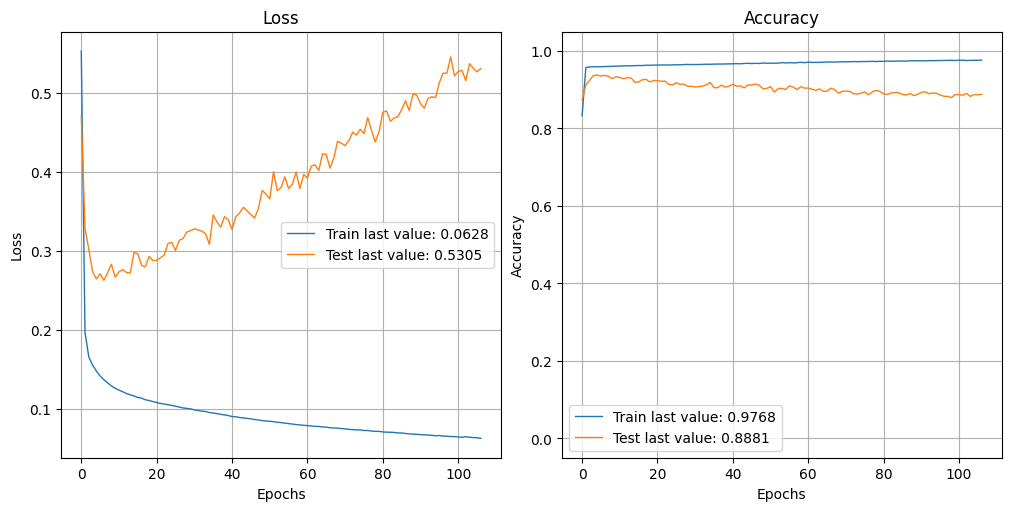

In [32]:
from plot_keras_history import plot_history
plot_history(history)

# Model 2

In [33]:
model = models.Sequential()

model.add(layers.Dense(32, activation="relu", input_dim = 169))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(4, activation="relu"))

model.add(layers.Dense(3, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [34]:
y_pred = model.predict(X_test_preproc)
y_pred

113/113 [==============================] - 0s 411us/step


array([[0.33799824, 0.34666038, 0.31534132],
       [0.35277355, 0.38008264, 0.26714376],
       [0.34047762, 0.35545754, 0.30406487],
       ...,
       [0.33964893, 0.35390428, 0.3064468 ],
       [0.34020245, 0.3530507 , 0.3067468 ],
       [0.33907568, 0.35033777, 0.31058654]], dtype=float32)

In [35]:
y_pred_encode = []
for prediction in y_pred:
    y_pred_encode.append(prediction.argmax())
        
y_pred_encode

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [36]:
baseline_acc = accuracy_score(y_classes, y_pred_encode)
baseline_acc

0.0

In [37]:
baseline_f1 = f1_score(y_classes, y_pred_encode, average='weighted')
baseline_f1

0.0

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                5440      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
 dense_6 (Dense)             (None, 8)                 88        
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 4)                

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

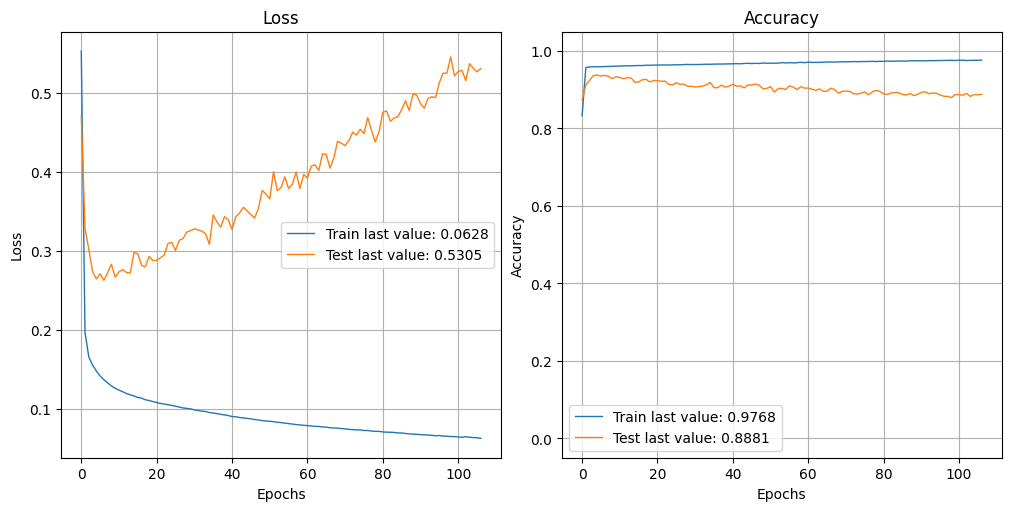

In [39]:
from plot_keras_history import plot_history
plot_history(history)

# Model 3 (every layer 32)

In [40]:
model = models.Sequential()

model.add(layers.Dense(32, activation="relu", input_dim = 169))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))

model.add(layers.Dense(3, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [41]:
y_pred = model.predict(X_test_preproc)
y_pred_encode = []
for prediction in y_pred:
    y_pred_encode.append(prediction.argmax())

baseline_acc = accuracy_score(y_classes, y_pred_encode)
baseline_f1 = f1_score(y_classes, y_pred_encode, average='weighted')

baseline_acc, baseline_f1

113/113 [==============================] - 0s 402us/step


(0.01888888888888889, 0.03707742639040349)

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

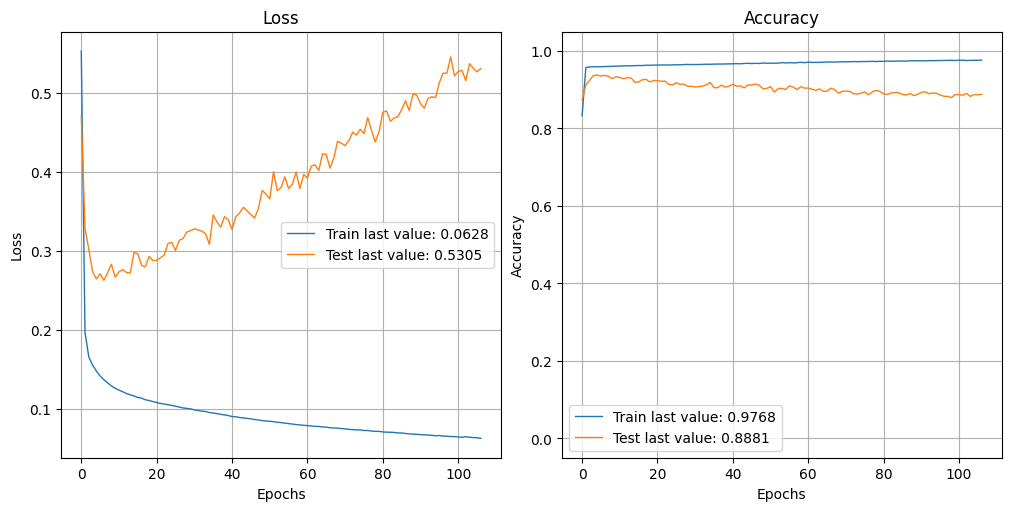

In [42]:
plot_history(history)

# Model 4 (everything 64)

In [43]:
model = models.Sequential()

model.add(layers.Dense(64, activation="relu", input_dim = 169))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))

model.add(layers.Dense(3, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

113/113 [==============================] - 0s 440us/step


(0.19361111111111112,
 0.32441238073074236,
 (<Figure size 1000x500 with 2 Axes>,
  array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
         <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
        dtype=object)))

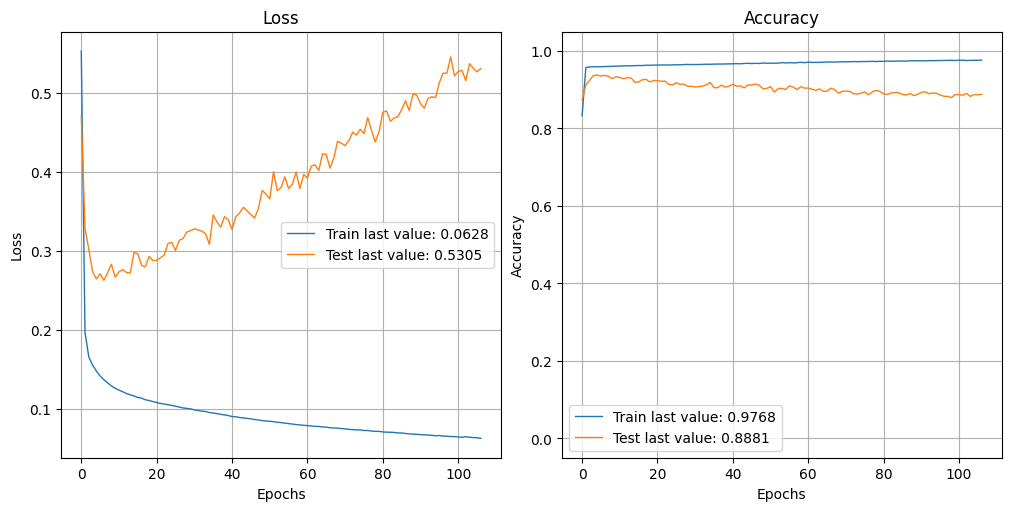

In [44]:
y_pred = model.predict(X_test_preproc)
y_pred_encode = []
for prediction in y_pred:
    y_pred_encode.append(prediction.argmax())

baseline_acc = accuracy_score(y_classes, y_pred_encode)
baseline_f1 = f1_score(y_classes, y_pred_encode, average='weighted')

baseline_acc, baseline_f1, plot_history(history)

# Model 5

In [45]:
model = models.Sequential()

model.add(layers.Dense(64, activation="relu", input_dim = 169))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(8, activation="relu"))

model.add(layers.Dense(3, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

113/113 [==============================] - 0s 413us/step


(0.0,
 0.0,
 (<Figure size 1000x500 with 2 Axes>,
  array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
         <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
        dtype=object)))

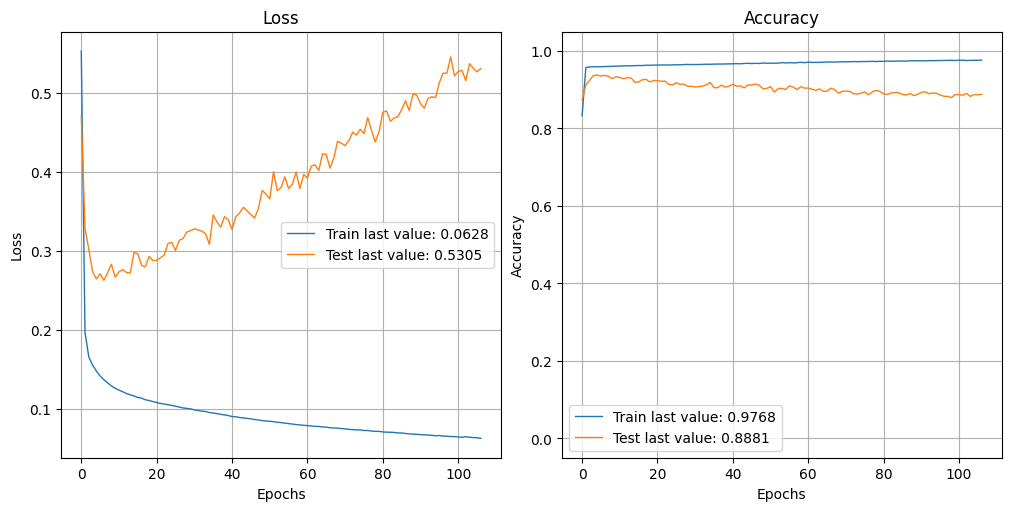

In [46]:
y_pred = model.predict(X_test_preproc)
y_pred_encode = []
for prediction in y_pred:
    y_pred_encode.append(prediction.argmax())

baseline_acc = accuracy_score(y_classes, y_pred_encode)
baseline_f1 = f1_score(y_classes, y_pred_encode, average='weighted')

baseline_acc, baseline_f1, plot_history(history)

# Model 6

In [47]:
model = models.Sequential()

model.add(layers.Dense(64, activation="relu", input_dim = 169))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(4, activation="relu"))
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(1, activation="relu"))

model.add(layers.Dense(3, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

113/113 [==============================] - 0s 631us/step


(1.0,
 1.0,
 (<Figure size 1000x500 with 2 Axes>,
  array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
         <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
        dtype=object)))

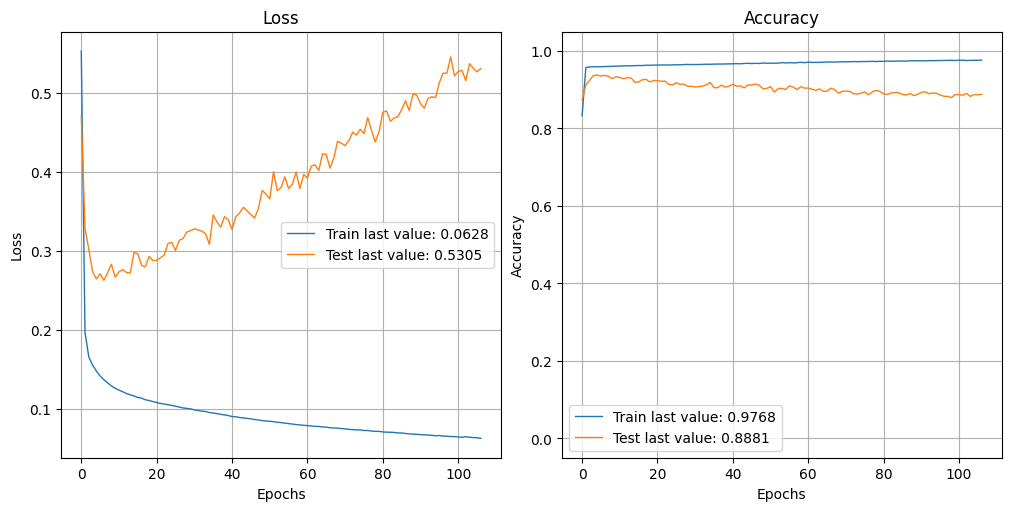

In [48]:
y_pred = model.predict(X_test_preproc)
y_pred_encode = []
for prediction in y_pred:
    y_pred_encode.append(prediction.argmax())

baseline_acc = accuracy_score(y_classes, y_pred_encode)
baseline_f1 = f1_score(y_classes, y_pred_encode, average='weighted')

baseline_acc, baseline_f1, plot_history(history)

# Model 7

In [49]:
#l1 premiere couche 
#l2 et/ou dropout sur les autres 

model = models.Sequential()

model.add(layers.Dense(128, activation="relu", input_dim = 169))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))

model.add(layers.Dense(3, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [50]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 128)               21760     
                                                                 
 dense_43 (Dense)            (None, 128)               16512     
                                                                 
 dense_44 (Dense)            (None, 64)                8256      
                                                                 
 dense_45 (Dense)            (None, 64)                4160      
                                                                 
 dense_46 (Dense)            (None, 32)                2080      
                                                                 
 dense_47 (Dense)            (None, 32)                1056      
                                                                 
 dense_48 (Dense)            (None, 3)                

In [51]:
es = EarlyStopping(patience=20, restore_best_weights=True)
history = model.fit(X_train_preproc, y_train_cat, 
          batch_size=256, epochs=1500, 
          validation_data=(X_val_preproc, y_val_cat),
          callbacks=[es])
history

Epoch 1/1500
159/159 [==============================] - 1s 3ms/step - loss: 0.2847 - accuracy: 0.9034 - val_loss: 0.2534 - val_accuracy: 0.9283
Epoch 2/1500
159/159 [==============================] - 0s 2ms/step - loss: 0.1366 - accuracy: 0.9593 - val_loss: 0.3050 - val_accuracy: 0.9053
Epoch 3/1500
159/159 [==============================] - 0s 3ms/step - loss: 0.1201 - accuracy: 0.9607 - val_loss: 0.2881 - val_accuracy: 0.9211
Epoch 4/1500
159/159 [==============================] - 1s 5ms/step - loss: 0.1071 - accuracy: 0.9622 - val_loss: 0.2873 - val_accuracy: 0.9213
Epoch 5/1500
159/159 [==============================] - 1s 4ms/step - loss: 0.0997 - accuracy: 0.9641 - val_loss: 0.3706 - val_accuracy: 0.8932
Epoch 6/1500
159/159 [==============================] - 1s 4ms/step - loss: 0.0912 - accuracy: 0.9660 - val_loss: 0.3354 - val_accuracy: 0.9078
Epoch 7/1500
159/159 [==============================] - 1s 4ms/step - loss: 0.0858 - accuracy: 0.9674 - val_loss: 0.4023 - val_accuracy:

113/113 [==============================] - 0s 535us/step


(0.7583333333333333,
 0.8625592417061612,
 (<Figure size 1000x500 with 2 Axes>,
  array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
         <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
        dtype=object)))

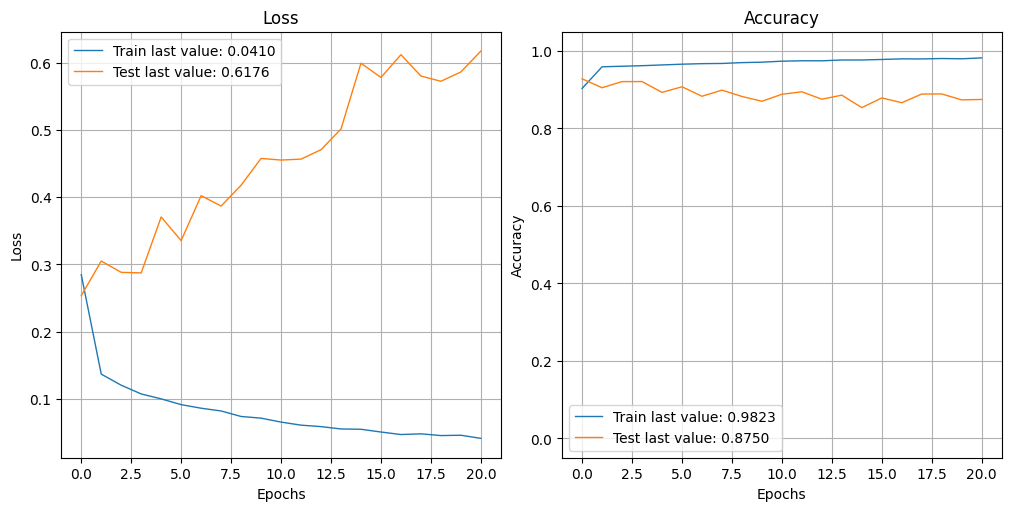

In [52]:
y_pred = model.predict(X_test_preproc)
y_pred_encode = []
for prediction in y_pred:
    y_pred_encode.append(prediction.argmax())

baseline_acc = accuracy_score(y_classes, y_pred_encode)
baseline_f1 = f1_score(y_classes, y_pred_encode, average='weighted')

baseline_acc, baseline_f1, plot_history(history)

In [56]:
X_test_eval_df = X_test.copy()
y_test_eval_df = y_test.copy()
X_test_eval_df['RealCompound'] = y_test_eval_df
X_test_eval_df['ModelCompound'] = y_pred_encode
X_test_eval_df.sort_values(by = ['Driver', 'Location', 'LapNumber'], inplace=True)
X_test_eval_df[(X_test_eval_df['Driver'] == 'LEC') & (X_test_eval_df['Location'] == 'Jeddah')]

,Driver,LapNumber,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,Position,Location,Year,...,WindSpeed,Final_Position,LocationYear,close_ahead,close_behind,is_pitting_ahead,is_pitting_behind,pitting_next_lap,RealCompound,ModelCompound
52796,LEC,6.0,True,SOFT,6.0,True,Ferrari,9.0,Jeddah,2023,...,1.5,7.0,Jeddah 2023,False,False,False,False,False,SOFT,0
52797,LEC,7.0,False,SOFT,7.0,True,Ferrari,8.0,Jeddah,2023,...,0.6,7.0,Jeddah 2023,False,False,False,False,False,SOFT,0
52798,LEC,8.0,False,SOFT,8.0,True,Ferrari,8.0,Jeddah,2023,...,1.2,7.0,Jeddah 2023,False,True,False,False,False,SOFT,0
52799,LEC,9.0,False,SOFT,9.0,True,Ferrari,7.0,Jeddah,2023,...,1.2,7.0,Jeddah 2023,True,False,False,False,False,SOFT,0
52800,LEC,10.0,False,SOFT,10.0,True,Ferrari,7.0,Jeddah,2023,...,1.2,7.0,Jeddah 2023,True,True,False,False,False,SOFT,0
52801,LEC,11.0,True,SOFT,11.0,True,Ferrari,7.0,Jeddah,2023,...,1.1,7.0,Jeddah 2023,False,True,False,False,False,SOFT,0
52802,LEC,12.0,False,SOFT,12.0,True,Ferrari,7.0,Jeddah,2023,...,1.2,7.0,Jeddah 2023,False,True,False,False,False,SOFT,0
52803,LEC,13.0,False,SOFT,13.0,True,Ferrari,6.0,Jeddah,2023,...,1.0,7.0,Jeddah 2023,False,True,False,False,False,SOFT,0
52804,LEC,14.0,True,SOFT,14.0,True,Ferrari,5.0,Jeddah,2023,...,0.8,7.0,Jeddah 2023,True,True,False,False,False,SOFT,0
52805,LEC,15.0,False,SOFT,15.0,True,Ferrari,5.0,Jeddah,2023,...,0.8,7.0,Jeddah 2023,True,False,False,False,False,HARD,0


# Final Model

In [63]:
model = models.Sequential()

model.add(layers.Dense(128, activation="relu", input_dim=169, kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.001)))

model.add(layers.Dense(3, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 128)               21760     
                                                                 
 dense_57 (Dense)            (None, 128)               16512     
                                                                 
 dense_58 (Dense)            (None, 64)                8256      
                                                                 
 dense_59 (Dense)            (None, 64)                4160      
                                                                 
 dense_60 (Dense)            (None, 32)                2080      
                                                                 
 dense_61 (Dense)            (None, 32)                1056      
                                                                 
 dense_62 (Dense)            (None, 3)                

In [65]:
es = EarlyStopping(patience=20, restore_best_weights=True)
history = model.fit(X_train_preproc, y_train_cat, 
          batch_size=256, epochs=1500, 
          validation_data=(X_val_preproc, y_val_cat),
          callbacks=[es])
history

Epoch 1/1500
159/159 [==============================] - 1s 3ms/step - loss: 1.1587 - accuracy: 0.9196 - val_loss: 0.6053 - val_accuracy: 0.9372
Epoch 2/1500
159/159 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.9588 - val_loss: 0.4585 - val_accuracy: 0.9395
Epoch 3/1500
159/159 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.9595 - val_loss: 0.3728 - val_accuracy: 0.9449
Epoch 4/1500
159/159 [==============================] - 0s 2ms/step - loss: 0.2905 - accuracy: 0.9591 - val_loss: 0.3520 - val_accuracy: 0.9451
Epoch 5/1500
159/159 [==============================] - 0s 2ms/step - loss: 0.2669 - accuracy: 0.9599 - val_loss: 0.3401 - val_accuracy: 0.9399
Epoch 6/1500
159/159 [==============================] - 0s 3ms/step - loss: 0.2494 - accuracy: 0.9601 - val_loss: 0.3348 - val_accuracy: 0.9385
Epoch 7/1500
159/159 [==============================] - 0s 3ms/step - loss: 0.2353 - accuracy: 0.9600 - val_loss: 0.3183 - val_accuracy:

113/113 [==============================] - 0s 467us/step


(0.7075,
 0.828696925329429,
 (<Figure size 1000x500 with 2 Axes>,
  array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
         <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
        dtype=object)))

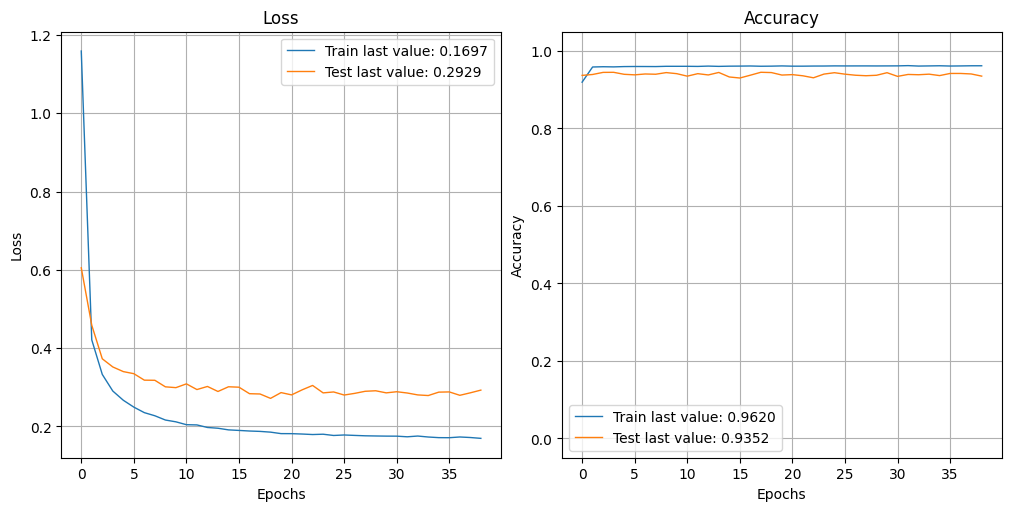

In [66]:
y_pred = model.predict(X_test_preproc)
y_pred_encode = []
for prediction in y_pred:
    y_pred_encode.append(prediction.argmax())

baseline_acc = accuracy_score(y_classes, y_pred_encode)
baseline_f1 = f1_score(y_classes, y_pred_encode, average='weighted')

baseline_acc, baseline_f1, plot_history(history)

In [73]:
X_test_eval_df = X_test.copy()
y_test_eval_df = y_test.copy()
X_test_eval_df['RealCompound'] = y_test_eval_df
X_test_eval_df['ModelCompound'] = y_pred_encode
X_test_eval_df.sort_values(by = ['Driver', 'Location', 'LapNumber'], inplace=True)
X_test_eval_df[(X_test_eval_df['Driver'] == 'LEC') & (X_test_eval_df['Location'] == 'Jeddah')]

,Driver,LapNumber,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,Position,Location,Year,...,WindSpeed,Final_Position,LocationYear,close_ahead,close_behind,is_pitting_ahead,is_pitting_behind,pitting_next_lap,RealCompound,ModelCompound
52796,LEC,6.0,True,SOFT,6.0,True,Ferrari,9.0,Jeddah,2023,...,1.5,7.0,Jeddah 2023,False,False,False,False,False,SOFT,2
52797,LEC,7.0,False,SOFT,7.0,True,Ferrari,8.0,Jeddah,2023,...,0.6,7.0,Jeddah 2023,False,False,False,False,False,SOFT,2
52798,LEC,8.0,False,SOFT,8.0,True,Ferrari,8.0,Jeddah,2023,...,1.2,7.0,Jeddah 2023,False,True,False,False,False,SOFT,2
52799,LEC,9.0,False,SOFT,9.0,True,Ferrari,7.0,Jeddah,2023,...,1.2,7.0,Jeddah 2023,True,False,False,False,False,SOFT,2
52800,LEC,10.0,False,SOFT,10.0,True,Ferrari,7.0,Jeddah,2023,...,1.2,7.0,Jeddah 2023,True,True,False,False,False,SOFT,2
52801,LEC,11.0,True,SOFT,11.0,True,Ferrari,7.0,Jeddah,2023,...,1.1,7.0,Jeddah 2023,False,True,False,False,False,SOFT,2
52802,LEC,12.0,False,SOFT,12.0,True,Ferrari,7.0,Jeddah,2023,...,1.2,7.0,Jeddah 2023,False,True,False,False,False,SOFT,2
52803,LEC,13.0,False,SOFT,13.0,True,Ferrari,6.0,Jeddah,2023,...,1.0,7.0,Jeddah 2023,False,True,False,False,False,SOFT,2
52804,LEC,14.0,True,SOFT,14.0,True,Ferrari,5.0,Jeddah,2023,...,0.8,7.0,Jeddah 2023,True,True,False,False,False,SOFT,2
52805,LEC,15.0,False,SOFT,15.0,True,Ferrari,5.0,Jeddah,2023,...,0.8,7.0,Jeddah 2023,True,False,False,False,False,HARD,0


In [71]:
model.evaluate(X_test_preproc,y_test_cat)

113/113 [==============================] - 0s 562us/step - loss: 0.2636 - accuracy: 0.9467


[0.26356247067451477, 0.9466666579246521]

In [75]:
laps['pitting_next_lap'].value_counts()

pitting_next_lap
False    55176
Name: count, dtype: int64

# 